In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv('titanic1.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
from sklearn import preprocessing
labelE=preprocessing.LabelEncoder()
data['encodesex']=labelE.fit_transform(data['Sex'])
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'encodesex'],
      dtype='object')

In [4]:
required=data[['Pclass','encodesex','Age']]
label=data[['Survived']]
required.shape



(887, 3)

In [5]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(required,label)

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [6]:
m=[[1,38,1]]
mn=nb.predict(m)
print(mn)
if(mn[0]== 0):
    print('dead')
else:
    print('Survived')

[1]
Survived


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [7]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(required,label,test_size=0.3)
y_train.shape

(620, 1)

In [8]:
nb.fit(x_train,y_train)

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [9]:
predicted=nb.predict(x_train)
predict=predicted.reshape(-1,1)
predict.shape

(620, 1)

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train Confusion Matrix is
 [[176  78]
 [ 51 315]]


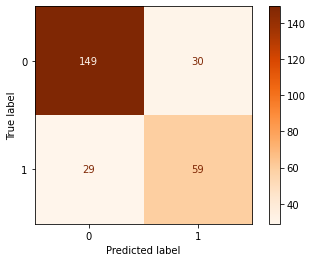

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
conftrain=confusion_matrix(y_train,predicted,labels=[1,0])
print("Train Confusion Matrix is\n", conftrain)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, x_test, y_test,cmap='Oranges')  


In [11]:
from sklearn import metrics
acc=metrics.accuracy_score(y_train,predict)
print(acc)
rec=metrics.recall_score(y_train,predict)
print(rec)
Tr=conftrain[0]
TP=Tr[0]
FP=Tr[1]
br=conftrain[1]
FN=br[0]
TN=br[1]
print(TP)
print(FP)
print(FN)
print(TN)

0.7919354838709678
0.6929133858267716
176
78
51
315


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


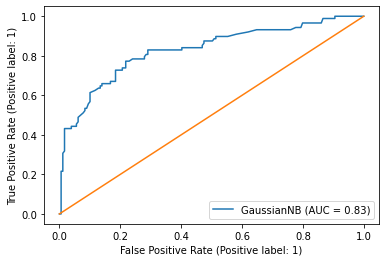

In [12]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(nb, x_test, y_test) 
plt.plot([0.0,1.0],[0.0,1.0],'-')